## Fraude de cartão de crédito

### Fonte de Dados:

- Os pagamentos digitais estão evoluindo, mas os criminosos cibernéticos também.

- De acordo com o Data Breach Index, mais de 5 milhões de registros são roubados diariamente, uma estatística preocupante que mostra - a fraude ainda é muito comum tanto para pagamentos do tipo Cartão-Presente quanto Cartão-Não Presente.

- No mundo digital de hoje, onde trilhões de transações com cartões acontecem por dia, a detecção de fraudes é um desafio.


### Explicação do das variáveis:

* **distancefromhome** - a distância de casa onde a transação aconteceu.

* **distancefromlast_transaction** - a distância da última transação aconteceu.

* **ratiotomedianpurchaseprice** - Razão da transação do preço de compra para o preço de compra mediano.

* **repeat_retailer** - É a transação que aconteceu do mesmo varejista.

* **used_chip** - É a transação através de chip (cartão de crédito).

* **usedpinnumber** - A transação aconteceu usando o número PIN.

* **online_order** - A transação é um pedido online.

* **fraude** - A transação é fraudulenta.

## Subindo a base de dados:

Importação de bibliotecas

In [1]:
import pandas as pd # Para trabalhar com dados tabulares
from sklearn.model_selection import train_test_split #separação dos dados
from sklearn.neighbors import KNeighborsClassifier #modelo de machine learning classificação
from sklearn.metrics import accuracy_score #avaliação do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report #métricas de avaliação
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Feature Engineer
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
import numpy as np #transformação dos dados
import warnings #remoção de avisos

In [2]:
dados = pd.read_csv('card_transdata.csv', sep=',') 

In [3]:
dados.head(3) # analisando os primeiros dados

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


In [4]:
dados.shape 

(1000000, 8)

## Tratando inconsistências na base

In [5]:
dados.isnull().sum() 

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
dados = dados.dropna()

## Análise exploratória dos dados

In [7]:
dados.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Número de transações fraudulentas
dados[dados["fraud"] == 1].fraud.count() #filtro com contagem dos dados

87403

In [9]:
Total = len(dados)
Total

1000000

In [10]:
Total = len(dados)
TotalNaoFraudes = dados[dados["fraud"] == 0].fraud.count()
TotalFraudes = dados[dados["fraud"] == 1].fraud.count()

Percentual_Fraudes = TotalFraudes / Total 

print("Total de dados: ", Total)
print("Total de não fraudes: ", TotalNaoFraudes)
print("Total de fraudes: ", TotalFraudes)
print("Percentual de fraudes na base: ", (round(Percentual_Fraudes, 2)*100), "%")

Total de dados:  1000000
Total de não fraudes:  912597
Total de fraudes:  87403
Percentual de fraudes na base:  9.0 %


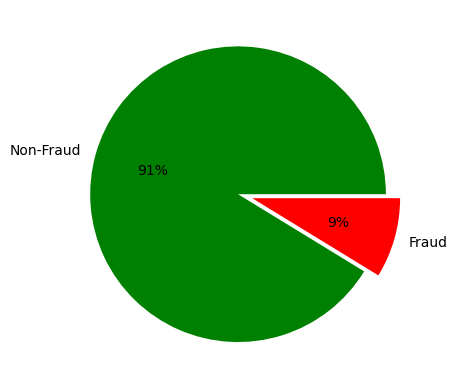

In [11]:
categororias = ["Non-Fraud", "Fraud"]
plt.pie(dados["fraud"].value_counts(), labels = categororias, autopct = "%.0f%%", explode= (0, 0.1), colors = ("g", "r"))
plt.show()

In [12]:
dados_fraudes = dados[dados["fraud"] == 1]

In [13]:
dados_fraudes.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0


In [14]:
dados_fraudes.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,87403.0,66.261876,134.391608,0.025847,4.585729,15.454219,101.110104,10632.723672
distance_from_last_transaction,87403.0,12.712185,47.997697,0.000407,0.328199,1.157631,4.598504,2160.499922
ratio_to_median_purchase_price,87403.0,6.006323,5.564320,0.011966,3.500270,5.071294,7.331222,266.689692
repeat_retailer,87403.0,0.880119,0.324825,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,87403.0,0.256399,0.436647,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,87403.0,0.003123,0.055801,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,87403.0,0.946318,0.225391,0.000000,1.000000,1.000000,1.000000,1.000000
fraud,87403.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='online_order', ylabel='count'>

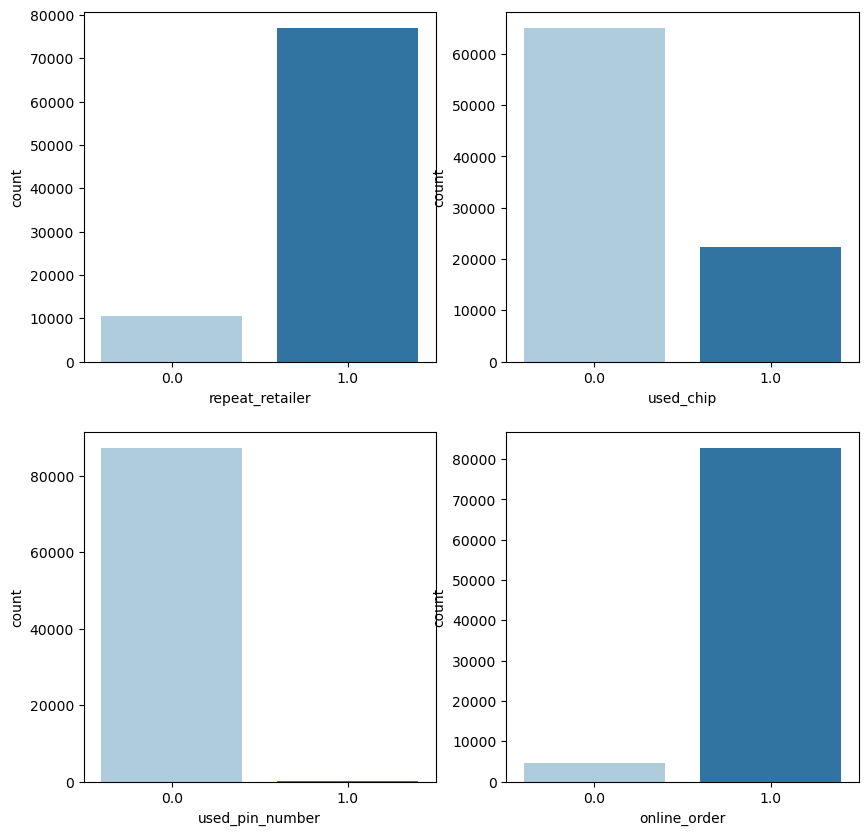

In [15]:
plt.figure(figsize = (10,10)) #Configurando o tamanho da visualização

plt.subplot(2,2,1)
sns.countplot(x = "repeat_retailer", palette = "Paired", data = dados_fraudes) #Aconteceu no mesmo varejista?

plt.subplot(2,2,2)
sns.countplot(x = "used_chip", palette = "Paired", data = dados_fraudes) #Uso de cartão de crédito?

plt.subplot(2,2,3)
sns.countplot(x = "used_pin_number", palette = "Paired", data = dados_fraudes) #Utilizou o mesmo número de PIN?

plt.subplot(2,2,4)
sns.countplot(x = "online_order", palette = "Paired", data = dados_fraudes) #Foi em uma compra online?

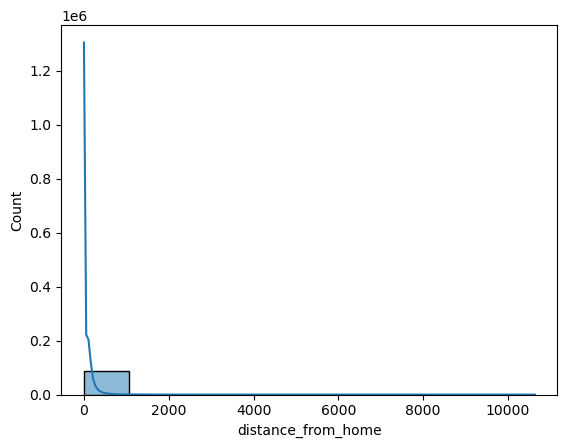

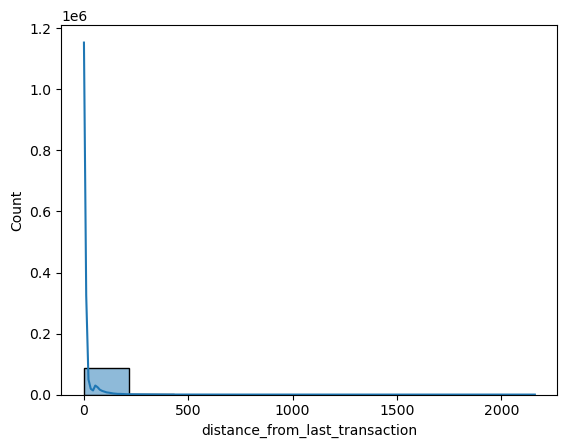

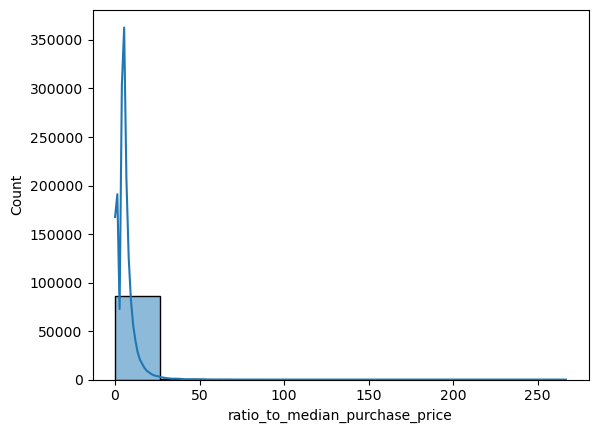

In [16]:
Colunas_Numericas = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
for column in Colunas_Numericas:
    plt.figure()
    plot = dados_fraudes[column]
    sns.histplot(plot, bins=10, kde=True)
    plt.show()

In [17]:
for column in [0, 1, 2]:
    dados_fraudes.iloc[:, column] = np.log10(dados_fraudes.iloc[:, column]) #transformação logarítma

C:\Users\Admin\AppData\Local\Temp\ipykernel_2668\2390613773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_fraudes.iloc[:, column] = np.log10(dados_fraudes.iloc[:, column]) #transformação logarítma
C:\Users\Admin\AppData\Local\Temp\ipykernel_2668\2390613773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_fraudes.iloc[:, column] = np.log10(dados_fraudes.iloc[:, column]) #transformação logarítma
C:\Users\Admin\AppData\Local\Temp\ipykernel_2668\2390613773.py:2: SettingWithCopyWarning: 
A v

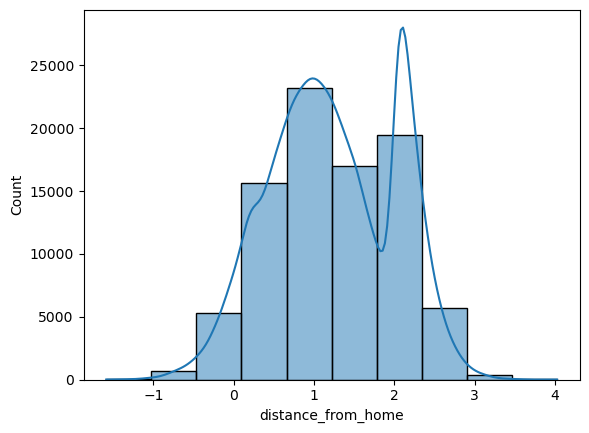

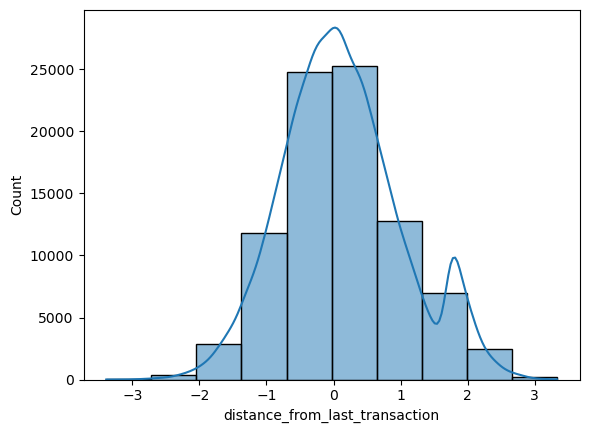

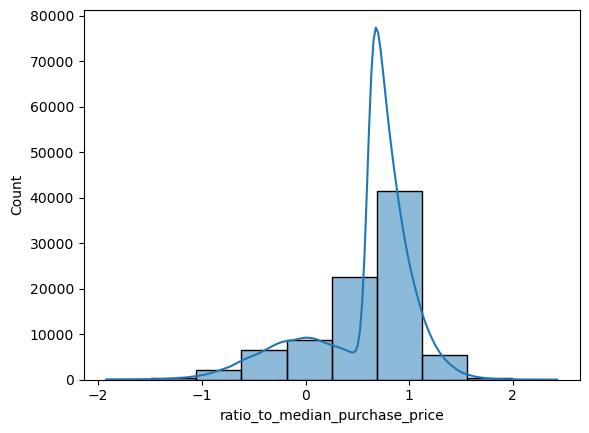

In [18]:
Colunas_Numericas_Normal = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
for column in Colunas_Numericas_Normal:
    plt.figure()
    plot = dados_fraudes[column]
    sns.histplot(plot, bins=10, kde=True)
    plt.show()

In [19]:
round(dados_fraudes.distance_from_last_transaction.mean(),2)

0.13

In [20]:
round(dados_fraudes.distance_from_last_transaction.std(),2)

0.9

<Axes: >

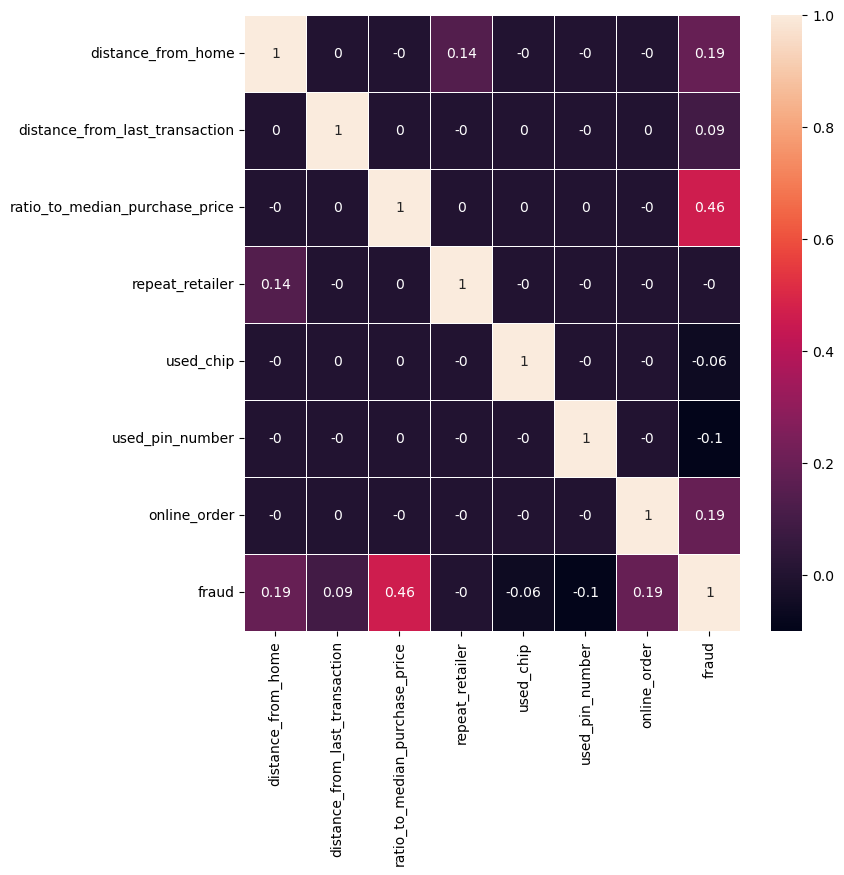

In [21]:
correlation_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

## Criação do modelo de Machine Learming

### Separação da base de treino e teste

In [22]:
x = dados[['distance_from_home','ratio_to_median_purchase_price', 'online_order']]
y = dados['fraud'] #target

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,
                                                    random_state=7) #20% para teste e 80% de treino

### Feature Engineer

Comparação da escala normal das variáveis vs. escalonamento das variáveis

- Comparação do real x dados transformado (normalização e padronização)
* padronização: zera a média e deixa o desvio padrão unitário.( obteremos desvios-padrão menores por meio do processo de normalização minmaxscaler).
* normalização: coloca a variável na escala entre 0 até 1.

- Análise da plotagem real e verificar se está muito diferente da plotagem com standerscaler e minmaxsclaer.
- Escolha o tipo de transformação de escala que melhor se adequa a suas variáveis. Se o desenho do gráfico mudar, você está descaracterizando o dado.

Transformar e normlaizar a escala das variáveis.

In [24]:
#scaler = StandardScaler() 
scaler = MinMaxScaler() 
scaler.fit(x_train)

MinMaxScaler()

In [25]:
# Na hora de transformar, devemos transformar ambos os conjuntos
x_train_escalonado = scaler.transform(x_train)#treino
x_test_escalonado = scaler.transform(x_test)#teste

In [26]:
x_train

,distance_from_home,ratio_to_median_purchase_price,online_order
459304,47.575388,0.992054,0.0
913193,28.754925,5.108844,1.0
278587,3.124923,2.124761,1.0
521682,21.042733,1.545996,1.0
293018,6.354463,0.320672,1.0
...,...,...,...
871097,10.965039,4.241274,1.0
932655,8.551129,0.700205,1.0
430609,3.765416,1.960024,0.0
246177,5.609825,23.143594,0.0


In [27]:
x_train_escalonado

array([[4.47397457e-03, 3.68805271e-03, 0.00000000e+00],
       [2.70392280e-03, 1.90607654e-02, 1.00000000e+00],
       [2.93438485e-04, 7.91775122e-03, 1.00000000e+00],
       ...,
       [3.53676362e-04, 7.30259599e-03, 0.00000000e+00],
       [5.27141795e-04, 8.64052299e-02, 0.00000000e+00],
       [9.41482438e-04, 3.40812710e-02, 0.00000000e+00]])

### Configurando o modelo

In [28]:
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_escalonado, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted w

Text(0, 0.5, 'Mean Error')

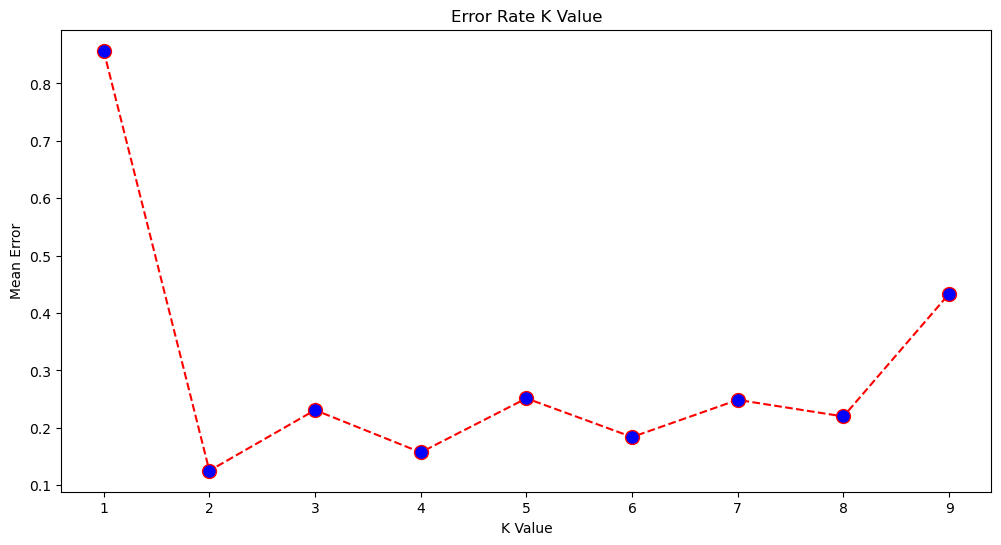

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [30]:
# Hiperparametro do nosos modelo é o número de vizinhos considerado (n_neighbors)
modelo_classificador = KNeighborsClassifier(n_neighbors=5)

In [31]:
# Está fazendo o treinamento do meu modelo de ML
modelo_classificador.fit(x_train_escalonado, y_train)

KNeighborsClassifier()

In [32]:
y_predito = modelo_classificador.predict(x_test_escalonado) #defininfo as predições

Checando questões de overfitting and underfitting:

In [33]:
#print('Training set score: {:.4f}'.format(modelo_classificador.score(x_train, y_train)))
#print('Test set score: {:.4f}'.format(modelo_classificador.score(x_test, y_test)))

### Analisando resultados

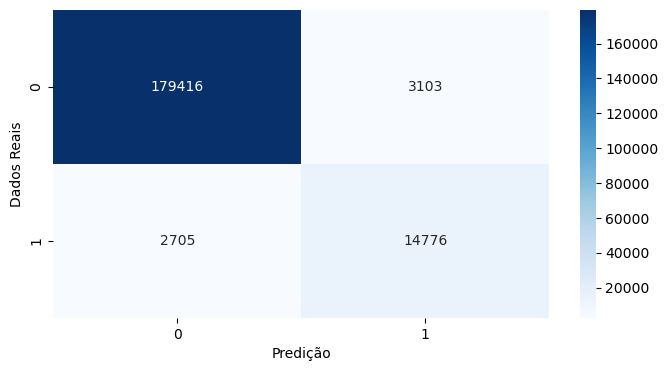

In [34]:
matriz_confusao = confusion_matrix(y_test, y_predito)
plt.figure(figsize = (8, 4))
sns.heatmap(matriz_confusao, annot = True, fmt="d",cmap = "Blues")
plt.xlabel("Predição");
plt.ylabel("Dados Reais");

In [35]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predito))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98    182519
         1.0       0.83      0.85      0.84     17481

    accuracy                           0.97    200000
   macro avg       0.91      0.91      0.91    200000
weighted avg       0.97      0.97      0.97    200000

